# HALO😁 
# Dibawah ini merupakan codingan mengenai Analysist Data

# Tujuan

1. Mengetahui dan memperbaiki apakah Dataset sudah clean atau belum?
2. Jika sudah bersih, apa saja yang bisa diolah menggunakan dataset tersebut?
3. Menampilkan data yang sudah diolah menggunakan streamlit

### 1. INFO DATA SET

1. Mengimport semua modul/library yang diperlukan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Melakukan pemanggilan data menggunakan csv reader

In [2]:
cust_df = pd.read_csv("https://raw.githubusercontent.com/Bovendiska/Tugas-Akhir/main/customers_dataset.csv")
cust_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
order_df = pd.read_csv("https://raw.githubusercontent.com/Bovendiska/Tugas-Akhir/main/orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


4. Setelah melakukan pemanggilan, maka kita harus mengecek mengenai data type yang digunakan masing-masing dataset. Apakah ada kesalahan data type atau tidak?

In [4]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**ADA KESALAHAN PADA DATA ORDER, ORDER_dELIVERED_CARRIER_DATE, ORDER_DELIVERED_CUSTOMER_DATE, DAN ORDER_ESTIMATED_DELIVERY_DATE MENGGUNAKAN TYPE DATA OBJECT. SEHARUSNYA PAKAI TYPE DATA DATE TIME. NANTI AKAN DIUBAH PADA BAGIAN CLEANING DATA**

5. Kita melakukan proses pengecekan apakah ada data yang null/missing value

In [6]:
cust_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**PADA BAGIAN CUSTOMER TIDAK ADA MISSING VALUE, NAMUN PADA ORDER ADA MISSING VALUE PADA KOLOM ORDER_APPROVED_AT, ORDER_DELIVERED_CARRIER_DATE, ORDER_DELIVERED_CUSTOMER_DATE**

6. Memeriksa apakah ada data yang duplikat atau tidak pada 2 dataset

In [8]:
print("Jumlah duplikasi: ", cust_df.duplicated().sum())
cust_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [9]:
print("Jumlah duplikasi: ", order_df.duplicated().sum())
order_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**TIDAK ADA JUMLAH DUPLIKASI, MAKA KITA LANJUT KE BAGIAN CLEANING DATA**

# 2. CLEANING DATA

Karena tidak ada duplikasi data dan hanya missing value saja pada bagian order, kita melakukan penanganan untuk itu

1. Melihat bagian mana saja yang mengalami missing value

In [10]:
order_df[order_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


Ternyata pada bagian order_approved sampai delivered customer. kemungkinan adalah kita hanya perlu untuk memodifikasi tipe data, karena tadi bagian info tipe data masing-masing masih berupa object

In [11]:
datetime_columns = ["order_purchase_timestamp","order_approved_at", "order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
 
for column in datetime_columns:
  order_df[column] = pd.to_datetime(order_df[column])

Kita lihat lagi apakah sudah benar berubah atau belum menggunakan info

In [12]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**ADA PERUBAHAN DI BAGIAN 3 SAMPAI 7 DIUBAH MENJADI DATETIME64**

Kita lihat lagi apakah masih terdapat missing value atau tidak

In [13]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Ternyata masih ada missing value pada bagian order_approved sampai dengan order_delivered_customer_date

Selanjutnya kita akan lihat kolom mana saja yang memenuhi syarat isna

In [14]:
order_df[order_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


Karena ini berhubungan dengan waktu kita akan mengisi missing value tersebut dengan metode interpolasi berdasarkan pola waktu tertentu

In [15]:
order_df['order_approved_at'] = order_df['order_approved_at'].interpolate(method='linear')
order_df['order_delivered_carrier_date'] = order_df['order_delivered_carrier_date'].interpolate(method='linear')
order_df['order_delivered_customer_date'] = order_df['order_delivered_customer_date'].interpolate(method='linear')

In [16]:
order_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [17]:
order_df[order_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


Bisa dilihat sudah tidak ada missing value lagi, selanjutnya kita akan mengolah data yang sudah bersih ini

Kita lihat lagi datanya menggunakan metode head

In [18]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


# 3. Data Processing

kita lihat dulu semua kolom pada dataset order

In [19]:
order_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:03:07.926630144,2018-01-04 22:48:17.780608768,2018-01-14 13:40:17.743410688,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:24:49,2017-09-18 20:12:22,2017-09-27 16:44:29,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:14:21,2018-01-24 11:04:02,2018-02-02 13:58:38,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 19:34:23,2018-05-07 19:09:00,2018-05-15 07:31:50,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


Tidak ada kolom untuk berapa lama barang sampai di tempat customer, maka kita akan membuat kolom itu beserta datanya menggunakan perhitungan sederhana 

In [20]:
delivery_time = order_df["order_estimated_delivery_date"] - order_df["order_delivered_customer_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_df["Arrived"] = round(delivery_time/86400)

In [21]:
order_df.rename(columns={'delivery_time': 'Arrived'}, inplace=True)

Kita lihat lagi apakah sudah ada kolom delivery time atau belum

In [22]:
order_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Arrived
count,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:03:07.926630144,2018-01-04 22:48:17.780608768,2018-01-14 13:40:17.743410688,2018-01-24 03:08:37.730111232,9.396064
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-606.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:24:49,2017-09-18 20:12:22,2017-09-27 16:44:29,2017-10-03 00:00:00,6.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:14:21,2018-01-24 11:04:02,2018-02-02 13:58:38,2018-02-15 00:00:00,12.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 19:34:23,2018-05-07 19:09:00,2018-05-15 07:31:50,2018-05-25 00:00:00,16.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,538.000000


Terdapat keanehan pada bagian Minimum, hasilnya adalah mines jadi kita modifikasi agar tidak mines

In [23]:
condition = order_df["Arrived"] < 0
order_df.loc[condition, "Arrived"] = 1

In [24]:
order_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Arrived
count,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:03:07.926630144,2018-01-04 22:48:17.780608768,2018-01-14 13:40:17.743410688,2018-01-24 03:08:37.730111232,13.304080
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,0.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:24:49,2017-09-18 20:12:22,2017-09-27 16:44:29,2017-10-03 00:00:00,6.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:14:21,2018-01-24 11:04:02,2018-02-02 13:58:38,2018-02-15 00:00:00,12.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 19:34:23,2018-05-07 19:09:00,2018-05-15 07:31:50,2018-05-25 00:00:00,16.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,538.000000


Data sudah diperbaharui, selanjutnya kita akan melihat hubungan antara Customer dan Order

Kita lihat lagi ada kolom apa saja di Customer dan order

In [25]:
cust_df.info()
print("")
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_

In [26]:
orders_customers_df = pd.merge(
    left=order_df,
    right=cust_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Arrived,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Jumlah order yang sampai di masing-masing kota

In [27]:
orders_customers_df.groupby(by="customer_city").Arrived.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,Arrived
0,sao paulo,187
1,rio de janeiro,138
2,belo horizonte,74
3,brasilia,63
4,salvador,63
5,fortaleza,60
6,porto alegre,59
7,campinas,57
8,guarulhos,55
9,curitiba,55


Jumlah order yang sudah sampai di masing-masing state

In [28]:
orders_customers_df.groupby(by="customer_state").Arrived.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,Arrived
0,SP,280
1,RJ,193
2,MG,122
3,RS,91
4,PR,88
5,BA,86
6,CE,72
7,GO,69
8,SC,65
9,PE,65


# 4. Data Visualization

Visualisasi Data untuk berapa banyak barang yang sudah arrived pada suatu state

Text(0.5, 0, '')

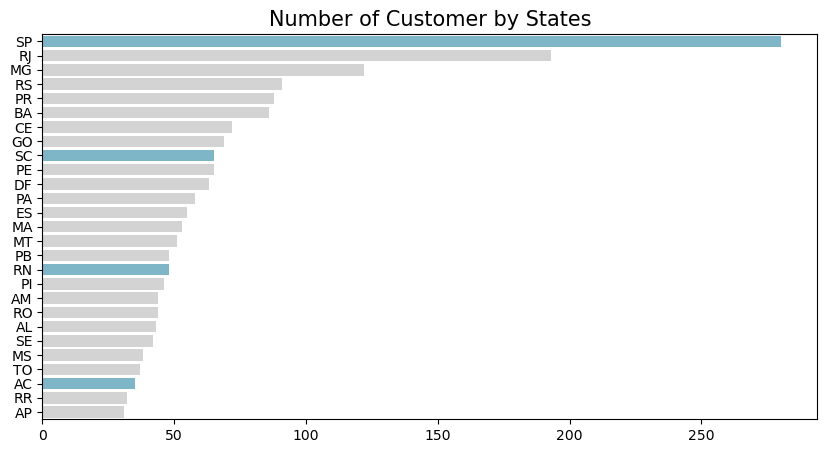

In [29]:
bystate_df = orders_customers_df.groupby(by="customer_state").Arrived.nunique().reset_index()
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="Arrived", 
    y="customer_state",
    data=bystate_df.sort_values(by="Arrived", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)

Visualisasi Data untuk seberapa banyak barang yang sudah arrived di masing-masing kota

Text(0.5, 0, '')

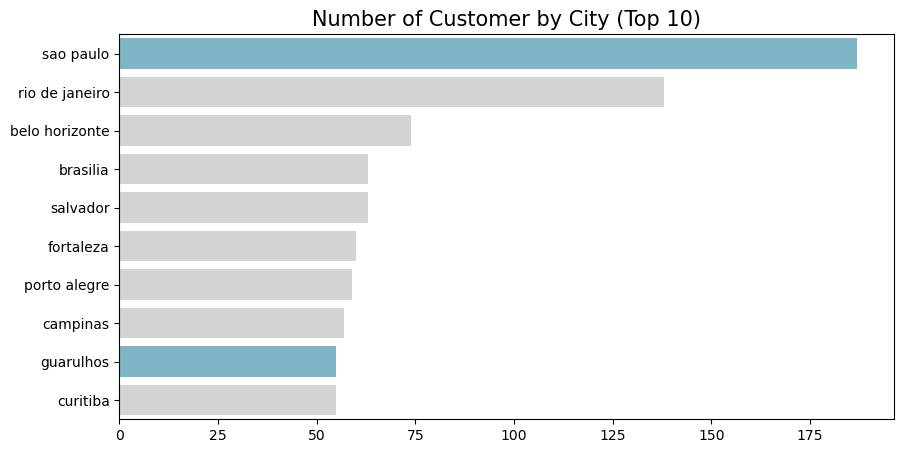

In [30]:
bycity_df = orders_customers_df.groupby(by="customer_city").Arrived.nunique().reset_index()

bycity_df_sorted = bycity_df.sort_values(by="Arrived", ascending=False)

top_10_cities = bycity_df_sorted.head(10)

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="Arrived", 
    y="customer_city",
    data=top_10_cities,
    palette=colors_
)
plt.title("Number of Customer by City (Top 10)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)

Dikarenakan pada city terlalu banyak, maka diambil 10 kota terbanyak

In [31]:
orders_customers_df.to_csv("all_data.csv", index=False)

# 5. MEMBUAT DASHBOARD

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

Menyiapkan Data Frame yang digunakan untuk membuat visualisasi data

In [33]:
def create_bystate_df(df):
    bystate_df = df.groupby(by="customer_state").Arrived.nunique().reset_index()
    bystate_df.rename(columns={
        "customer_id": "customer_count"
    }, inplace=True)
    
    return bystate_df

In [34]:
def create_bycity_df(df):
    bystate_df = df.groupby(by="customer_city").Arrived.nunique().reset_index()
    bystate_df.rename(columns={
        "customer_id": "customer_count"
    }, inplace=True)
    
    return bycity_df

In [35]:
st.header('Dicoding Collection Dashboard :sparkles:')

2024-03-03 16:49:56.959 
  command:

    streamlit run C:\Users\Lenovo\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

DeltaGenerator()

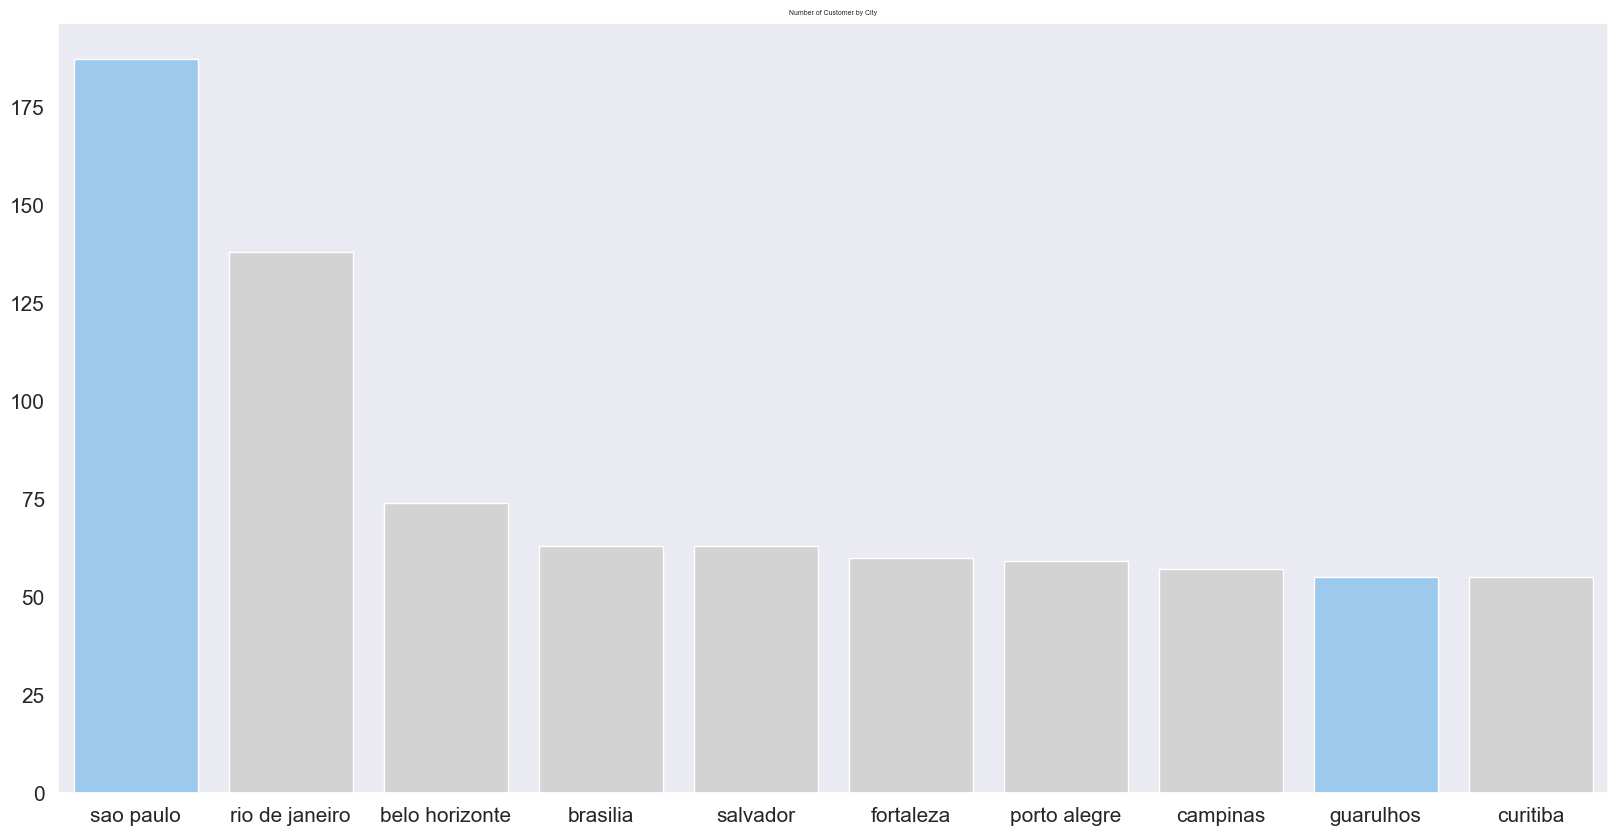

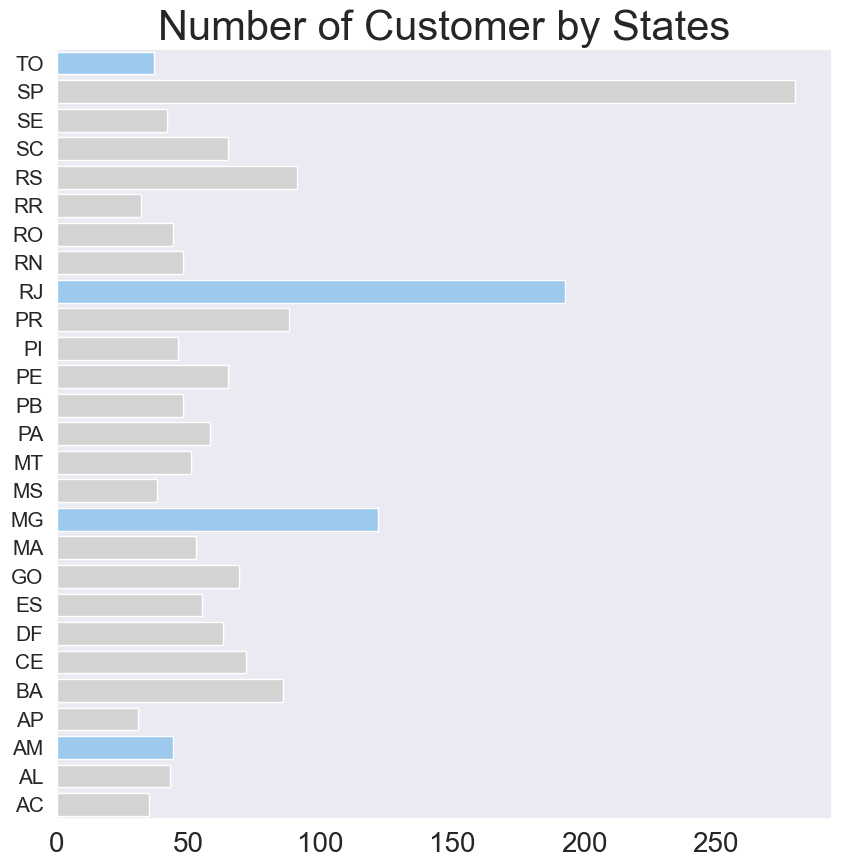

In [36]:

st.subheader("Customer Demographics")


fig, ax = plt.subplots(figsize=(20, 10))
bycity_df_sorted = bycity_df.sort_values(by="Arrived", ascending=False)


top_10_cities = bycity_df_sorted.head(10)

colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="Arrived", 
    x="customer_city",
    data=top_10_cities,  
    palette=colors,
    ax=ax,
    dodge=2.0
)
ax.set_title("Number of Customer by City", loc="center", fontsize=5)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
st.pyplot(fig)

# Plotting for Customer by States
fig, ax = plt.subplots(figsize=(10, 10))
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="Arrived", 
    y="customer_state",
    data=bystate_df.sort_values(by="customer_state", ascending=False),
    palette=colors,
    ax=ax
)
ax.set_title("Number of Customer by States", loc="center", fontsize=30)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=15)
st.pyplot(fig)
